In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [7]:
# create a lookup between integers and letters (strings to integers)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

itos = {i:s for s,i in stoi.items()}


In [13]:
# create a training set of bigrams (x, y)
xs, ys = [], []


for w in words[:1]:
    # add start and end tokens
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

# convert
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [22]:
xs.dtype

torch.int64

In [16]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

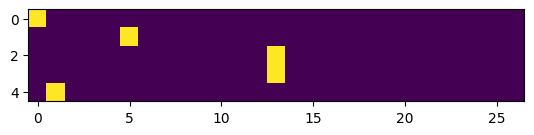

In [24]:
plt.imshow(xenc)

In [28]:
W = torch.randn((27,27))

In [29]:
xenc @ W

tensor([[-1.4446,  1.5613,  1.7227, -0.9352, -0.5976,  1.4842, -0.3780, -0.3860,
          0.4226, -1.1306,  0.8038, -0.9704,  1.4277,  0.3635, -0.8039,  0.1546,
          1.5444,  0.1054,  0.8251, -0.9837,  0.1382,  1.5234, -0.0569,  0.4434,
          0.9818,  0.3130,  0.9811],
        [ 0.1095, -1.7499,  0.3395,  0.8650,  0.2118,  0.9502, -1.7513, -0.2273,
         -0.6857, -1.4736,  0.1924,  1.3809,  0.1282,  0.5592, -0.2330,  1.0267,
          0.2027,  0.2502, -0.1782, -2.5403, -1.7601,  0.8037,  1.6537,  0.2206,
          1.5186, -1.8988, -2.6561],
        [ 0.8790, -1.5999,  1.0575,  0.8708, -1.4956, -0.7685,  0.9616, -1.8190,
          1.3649, -1.0109,  0.1765,  1.4058, -0.7478, -2.2695, -1.1432, -0.7992,
          2.2337, -0.6207, -0.1844, -0.6460, -1.2409,  0.0426,  0.5569, -0.5165,
         -1.8262,  0.4860, -0.2482],
        [ 0.8790, -1.5999,  1.0575,  0.8708, -1.4956, -0.7685,  0.9616, -1.8190,
          1.3649, -1.0109,  0.1765,  1.4058, -0.7478, -2.2695, -1.1432, -0.7992

In [30]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])